## Ganapathi Preprocessing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics
from ipywidgets import widgets, interactive
import gc
import joblib
import warnings
from datetime import datetime, timedelta 
from typing import Union
from tqdm.notebook import tqdm_notebook as tqdm
from itertools import cycle
import datetime as dt

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings('ignore')
Base_path = './646/sales-forecast/'

In [7]:
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [8]:
# Read in the data
INPUT_DIR =  './646/sales-forecast/'
df_cal = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
df_stv = pd.read_csv(f'{INPUT_DIR}/sales_train_validation.csv')
df_ss = pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')
df_sellp = pd.read_csv(f'{INPUT_DIR}/sell_prices.csv')

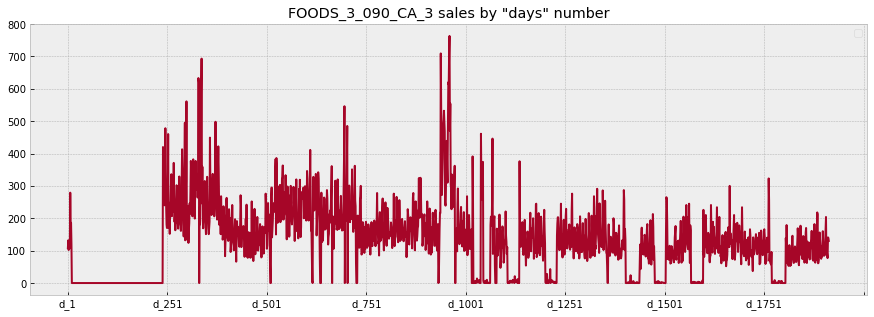

In [10]:
d_cols = [c for c in df_stv.columns if 'd_' in c] # sales data columns


df_stv.loc[df_stv['id'] == 'FOODS_3_090_CA_3_validation'] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(15, 5),
          title='FOODS_3_090_CA_3 sales by "days" number',
          color=next(color_cycle))
plt.legend('')
plt.show()

[section title]Sales broken down by time variables
####Now that we have our example item lets see how it sells by:
####Day of the week
####Month
##Yea

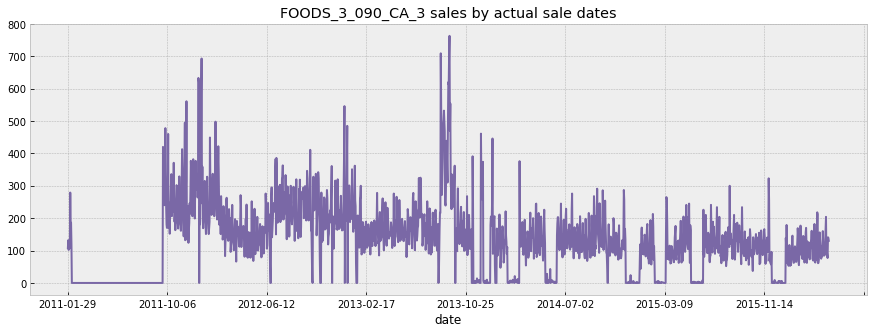

In [15]:
#Merge calendar on our items' data
example = df_stv.loc[df_stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(df_cal, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

# Select more top selling examples
example2 = df_stv.loc[df_stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'}) # Name it correctly
example2 = example2.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example2 = example2.merge(df_cal, how='left', validate='1:1')

example3 = df_stv.loc[df_stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) # Name it correctly
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(df_cal, how='left', validate='1:1')

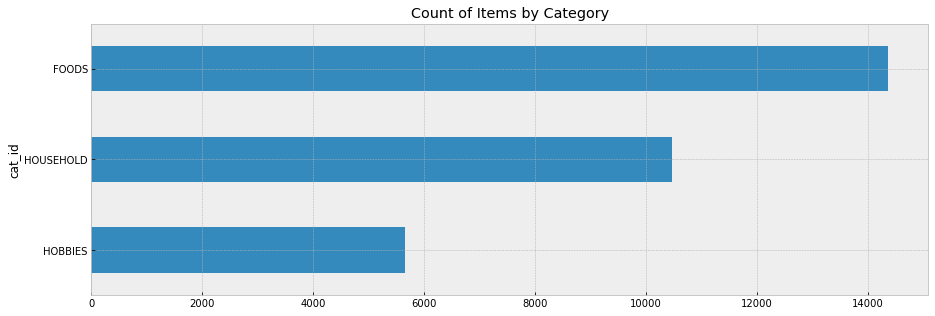

In [24]:
df_stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

In [ ]:
Combined Sales over Time by Type¶
We have several item types:
Hobbies
Household
Foods
Lets plot the total demand over time for each type

In [ ]:
df_stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

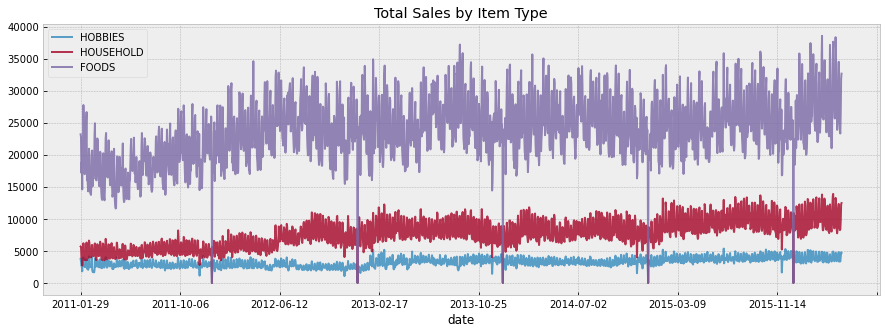

In [22]:
past_sales = df_stv.set_index('id')[d_cols] \
    .T \
    .merge(df_cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


for i in df_stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(df_stv['cat_id'].unique())
plt.show()

Sales by Store
We are provided data for 10 unique stores. What are the total sales by stores?

Note that some stores are more steady than others.
CA_2 seems to have a big change occur in 2015

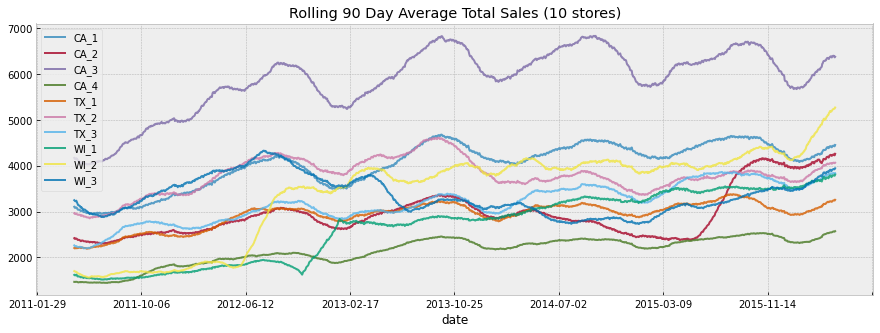

In [23]:
store_list = df_sellp['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []
for store, d in sellp.query('item_id == "FOODS_3_090"').groupby('store_id'):
    d.plot(x='wm_yr_wk',
          y='sell_price',
          style='.',
          color=next(color_cycle),
          figsize=(15, 5),
          title='FOODS_3_090 sale price over time',
         ax=ax,
          legend=store)
    stores.append(store)
    plt.legend()
plt.legend(stores)
plt.show()